In [1]:

# імпорт бібліотек
import cv2
import tkinter as tk
import os
from tkinter import filedialog
import matplotlib.pyplot as plt
import numpy as np

## Допоміжна теорія

> `Дискретний шлях бінарного зображення між двома пікселями` –
це послідовність пікселів, в якій при переміщенні від початкового
пікселя до кінцевого пікселя кожен піксель послідовності має два
сусідні пікселі, що належать цій послідовності: попередній і
наступний.


> `Контур бінарного зображення` – це будь-який замкнутий шлях. У
разі бінарного зображення контур – це межа зв'язаної області з
однаковою інтенсивністю.

> `Режими групування у cv.findContours()`
> - CV_RETR_LIST - видає всі контури без групування;
> - CV_RETR_EXTERNAL – видає лише крайні зовнішні контури. 
> - CV_RETR_CCOMP - групує контури у дворівневу ієрархію. На
верхньому рівні – зовнішні контури об'єкта. На другому рівні –
контури отворів, якщо такі є. Решта контурів потрапляють на верхній
рівень.
> - CV_RETR_TREE - групує контури в багаторівневу ієрархію.


> `Режими пакування у cv.findContours()`
> - CV_CHAIN_APPROX_NONE – упаковка відсутня і всі контури
зберігаються у вигляді відрізків, що складаються з двох пікселів.
> - CV_CHAIN_APPROX_SIMPLE — склеює всі горизонтальні,
вертикальні та діагональні контури.
> - CHAIN_APPROX_TC89_L1, CHAIN_APPROX_TC89_KCOS - застосовує до контурів метод упаковки (апроксимації) TehChin. Вони дозволяють позбавитися від зайвих вершин, зменшуючи кількість точок.

## Допоміжні функції для роботи з картинками

In [2]:
def show_image(img, title=None):
    """
    Відображує зображення у matplotlib.

    Parameters:
    - `img (numpy.ndarray)`: Зображення у форматі NumPy ndarray.
    - `title (str, optional)`: Заголовок для відображення. За замовчуванням - None.

    Returns:
    - `None`
    """
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [3]:
def load_image(flag):
    """
    Функція зчитування зображення.

    Parameters:
    - `flag (int)`: Прапорець для cv2.imread, вказує режим завантаження (наприклад, cv2.IMREAD_COLOR).

    Returns:
    - `numpy.ndarray or None`: Зображення у форматі NumPy ndarray або None, якщо завантаження не вдалося.
    """
    file_path = filedialog.askopenfilename()

    if not file_path:
        return None
    if not os.path.isfile(file_path):
        return None

    # Завантажуємо кольорове зображення
    return cv2.imread(file_path, flag)

## Знаходження та обробка контурів

In [4]:
def binary_inverted_picture(img):
    """Функція конвертації зображення у бінарно-інвертоване.
    
    Parameters:
    - `img (array)`: Картинка для інвертації у монохромі.
    
    Returns:
    - `array`: Бінарно-інвертована картинка.
    """
    img = cv2.medianBlur(img, 5)  # Функція розмиття (згладжування) зображення медіанним фільтром, де 5 – параметр розмиття (можна вибирати лише непарним та більше 1)

    thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)  # Перетворюємо вхідне зображення на бінарно-інвертоване зображення. Тут 255 – максимальне значення, 3 – граничне значення для пікселя (товщина контуру), 10 – граничне значення для всього зображення
    return thresh


In [5]:
def show_binary_inverted_picture(thresh):
    """Функція показу бінарно-інвертованого зображення

    Args:
    - `thresh (array)`: бінарно-інвертована картинка для пошука контурів
    
    Returns:
    - `None`
      
    Examples:
        >>> show_binary_inverted_picture(thresh)
        # бінарно-інвертована картинка відображена через matplotlib
    """
    
    show_image(thresh, 'Бінарно-інвертована обрана картинка для пошука контурів')

In [6]:

def plot_contours(img, contour_group_mode, contour_packaging_mode):
    """
    Функція пошуку та виводу знайдених контурів.

    Parameters:
    - `img (numpy.ndarray)`: Зображення у форматі NumPy ndarray.   
    - `contour_group_mode (int)`: Режим групування контурів (наприклад, cv2.RETR_EXTERNAL).
    - `contour_packaging_mode (int)`: Режим упаковування контурів (наприклад, cv2.CHAIN_APPROX_SIMPLE).
    
    Returns:
    - `None`
    """
    thresh = binary_inverted_picture(img)

    contours, hierarchy = cv2.findContours(thresh.copy(), contour_group_mode, contour_packaging_mode)  # модуль контурів
    
    # cnt = contours[123] # в змінній зберігається якийсь один контур з массиву contours
    print(f'Було знайдено {len(contours)} контурів')
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    img = cv2.drawContours(img, contours, -1, (0, 255, 0), 1)
    show_image(img,'Зображені поверх картинки знайдені контури')
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

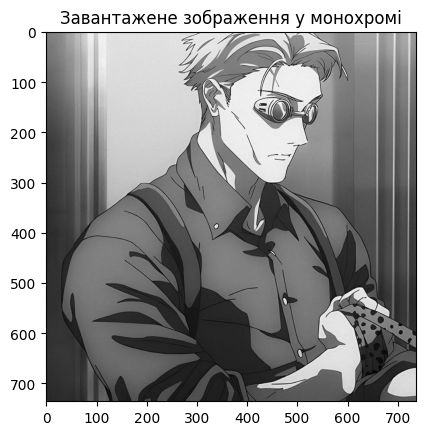

In [7]:
# ініціалізація зображення
img = load_image(0)
show_image(img, 'Завантажене зображення у монохромі')

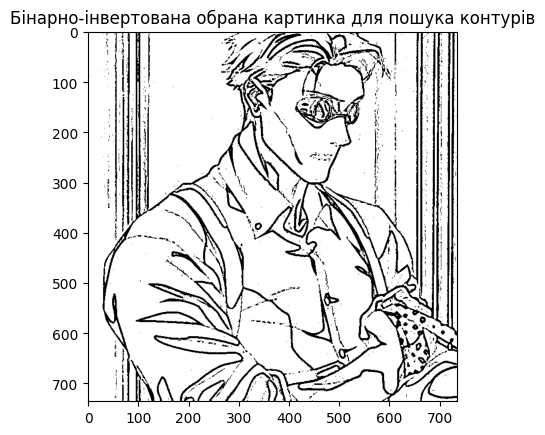

In [8]:
# фільтрація зображення перед пошуком контурів
bin_inv_img = binary_inverted_picture(img)
show_binary_inverted_picture(bin_inv_img)

Режим cv2.RETR_LIST групування 
видає всі контури без групування.
Було знайдено 1554 контурів


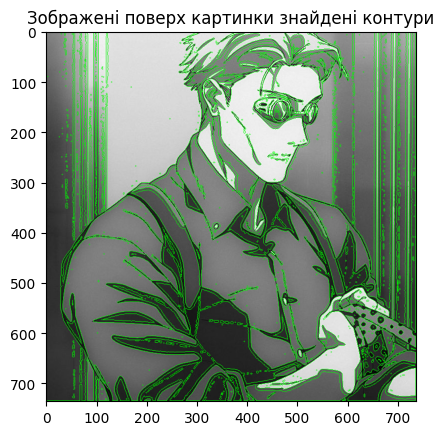

Режим cv2.RETR_EXTERNAL групування 
видає лише крайні зовнішні контури.
Було знайдено 125 контурів


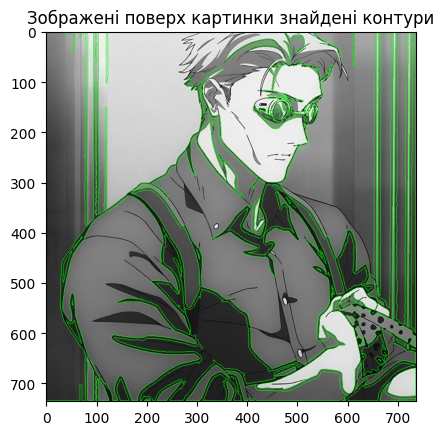

Режим cv2.RETR_CCOMP групування 
групує контури у дворівневу ієрархію.
Було знайдено 1554 контурів


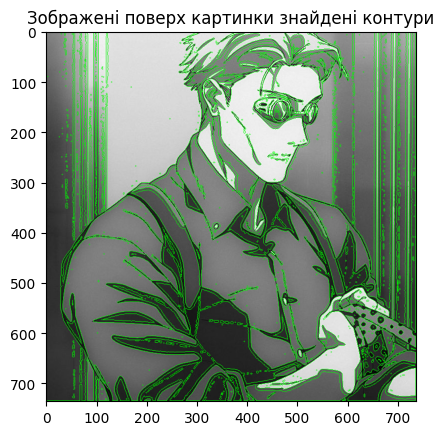

Режим cv2.RETR_TREE групування 
групує контури в багаторівневу ієрархію.
Було знайдено 1554 контурів


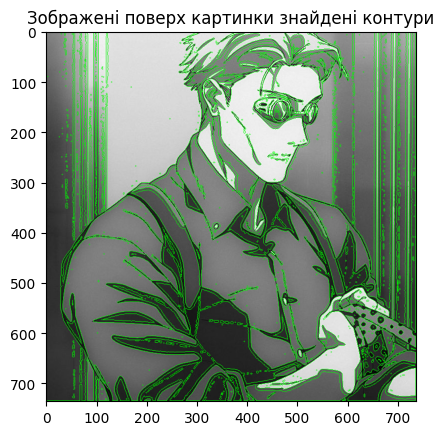

In [9]:
# Метод пакування CV_CHAIN_APPROX_SIMPLE
print('Режим cv2.RETR_LIST групування \nвидає всі контури без групування.')
plot_contours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print('Режим cv2.RETR_EXTERNAL групування \nвидає лише крайні зовнішні контури.')
plot_contours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print('Режим cv2.RETR_CCOMP групування \nгрупує контури у дворівневу ієрархію.')
plot_contours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
print('Режим cv2.RETR_TREE групування \nгрупує контури в багаторівневу ієрархію.')
plot_contours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

Режим cv2.RETR_LIST групування 
видає всі контури без групування.
Було знайдено 1554 контурів


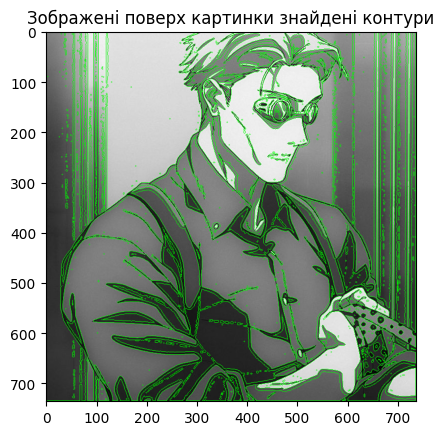

Режим cv2.RETR_EXTERNAL групування 
видає лише крайні зовнішні контури.
Було знайдено 125 контурів


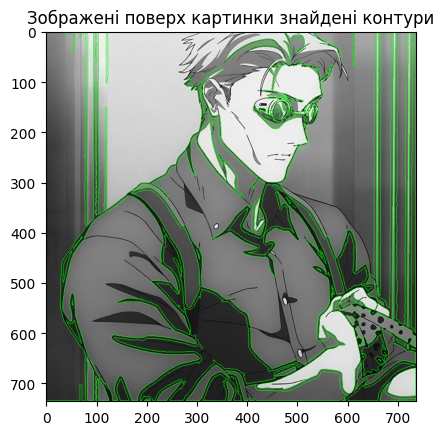

Режим cv2.RETR_CCOMP групування 
групує контури у дворівневу ієрархію.
Було знайдено 1554 контурів


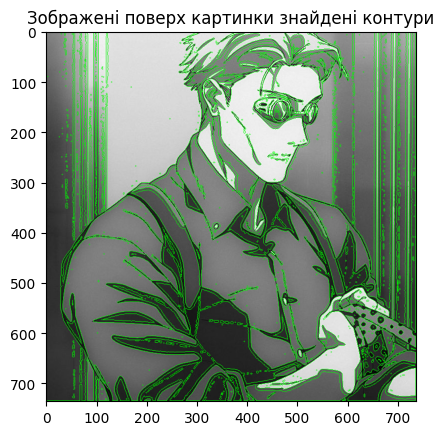

Режим cv2.RETR_TREE групування 
групує контури в багаторівневу ієрархію.
Було знайдено 1554 контурів


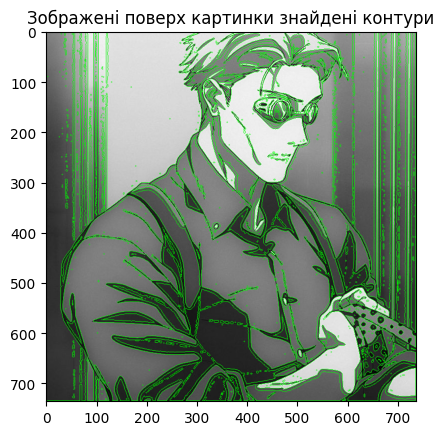

In [10]:
# Метод пакування CV_CHAIN_APPROX_NONE
print('Режим cv2.RETR_LIST групування \nвидає всі контури без групування.')
plot_contours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print('Режим cv2.RETR_EXTERNAL групування \nвидає лише крайні зовнішні контури.')
plot_contours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print('Режим cv2.RETR_CCOMP групування \nгрупує контури у дворівневу ієрархію.')
plot_contours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
print('Режим cv2.RETR_TREE групування \nгрупує контури в багаторівневу ієрархію.')
plot_contours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

Режим cv2.RETR_LIST групування 
видає всі контури без групування.
Було знайдено 1554 контурів


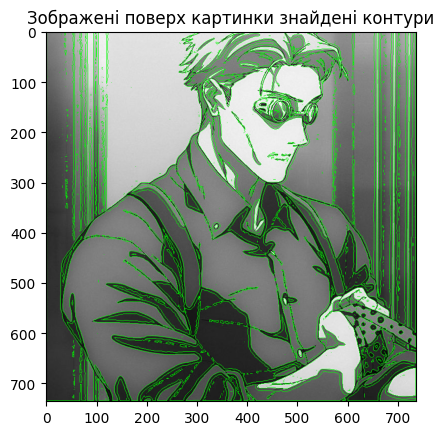

Режим cv2.RETR_EXTERNAL групування 
видає лише крайні зовнішні контури.
Було знайдено 125 контурів


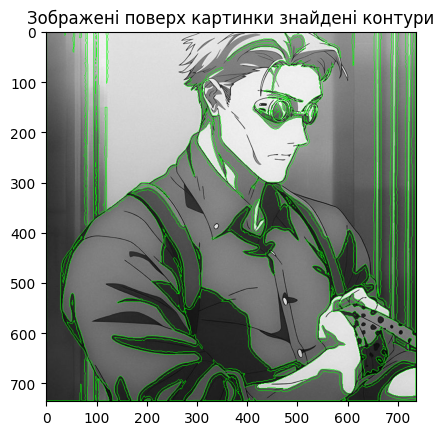

Режим cv2.RETR_CCOMP групування 
групує контури у дворівневу ієрархію.
Було знайдено 1554 контурів


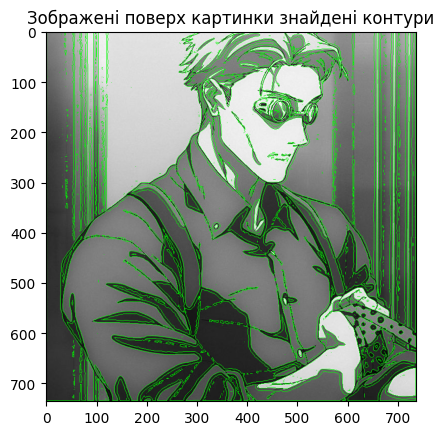

Режим cv2.RETR_TREE групування 
групує контури в багаторівневу ієрархію.
Було знайдено 1554 контурів


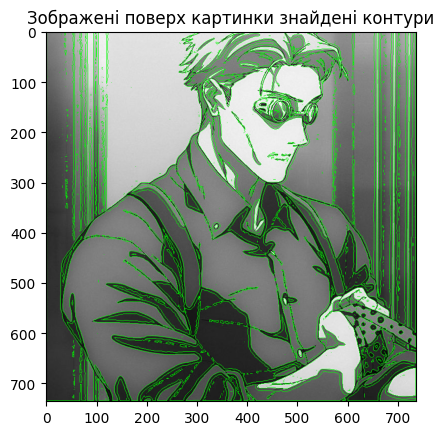

In [11]:
# Метод пакування cv2.CHAIN_APPROX_TC89_L1
print('Режим cv2.RETR_LIST групування \nвидає всі контури без групування.')
plot_contours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_TC89_L1)
print('Режим cv2.RETR_EXTERNAL групування \nвидає лише крайні зовнішні контури.')
plot_contours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)
print('Режим cv2.RETR_CCOMP групування \nгрупує контури у дворівневу ієрархію.')
plot_contours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_TC89_L1)
print('Режим cv2.RETR_TREE групування \nгрупує контури в багаторівневу ієрархію.')
plot_contours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1)

Режим cv2.RETR_LIST групування 
видає всі контури без групування.
Було знайдено 1554 контурів


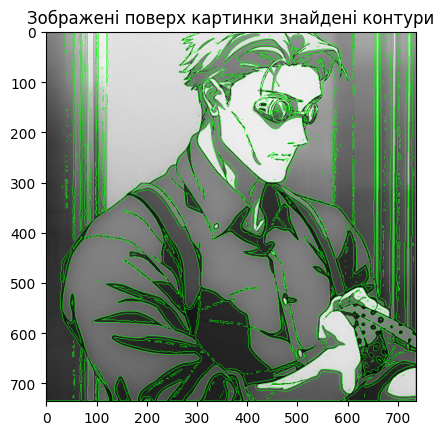

Режим cv2.RETR_EXTERNAL групування 
видає лише крайні зовнішні контури.
Було знайдено 125 контурів


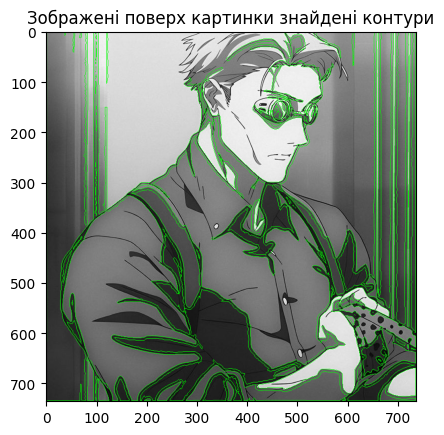

Режим cv2.RETR_CCOMP групування 
групує контури у дворівневу ієрархію.
Було знайдено 1554 контурів


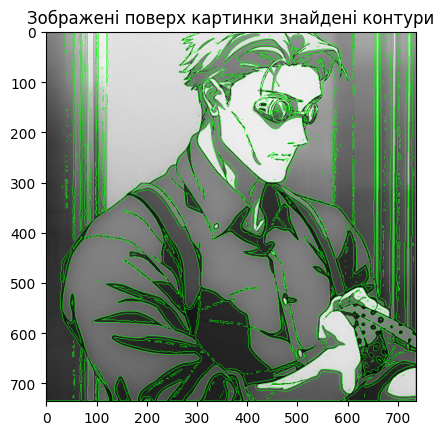

Режим cv2.RETR_TREE групування 
групує контури в багаторівневу ієрархію.
Було знайдено 1554 контурів


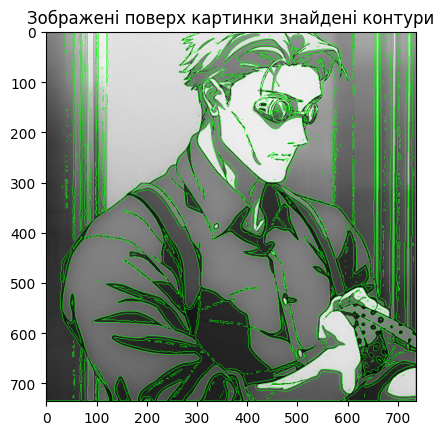

In [12]:
# Метод пакування cv2.CHAIN_APPROX_TC89_KCOS
print('Режим cv2.RETR_LIST групування \nвидає всі контури без групування.')
plot_contours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_TC89_KCOS)
print('Режим cv2.RETR_EXTERNAL групування \nвидає лише крайні зовнішні контури.')
plot_contours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)
print('Режим cv2.RETR_CCOMP групування \nгрупує контури у дворівневу ієрархію.')
plot_contours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_TC89_KCOS)
print('Режим cv2.RETR_TREE групування \nгрупує контури в багаторівневу ієрархію.')
plot_contours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)